In [1]:
# utilizado para manejos de directorios y rutas
import os

# Librería para manejo de datos en formato tabular
import pandas as pd

# Computacion vectorial y cientifica para python
import numpy as np # calculadora súper potente que trabaja con números y arreglos de números

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot # libreria de trazado de gráficos 2D
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
#Con este comando activado, cualquier gráfico que hagas se mostrará justo debajo del código, en lugar de abrirse en una nueva ventana
%matplotlib inline

# 1 Regresión lineal con una variable

La primera columna es el número de horas que estudió el estudiante y la segunda columna las calificaciones que obtuvo

In [2]:
from google.colab import drive # te permite conectar tu Google Drive con tu entorno de trabajo en Colab
#Cuando ejecutas este comando, Google te pedirá permiso para permitir que Colab acceda a tu Drive.
#Una vez que le des permiso, verás todos tus archivos de Drive bajo el directorio /content/drive/.
drive.mount('/content/drive') #"monta" tu Google Drive en el entorno de Colab

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


No es Necesario delimiter: pandas reconoce automáticamente el formato CSV y asume que los valores están separados por comas, por lo que no es necesario especificar delimiter cuando las comas son el separador predeterminado.

-Cada fila de la matriz representa un ejemplo (un registro), y cada columna representa una característica (atributo).

-data[:, 0]: Selecciona todas las filas (:) de la primera columna (0), que contiene la población de las ciudades. Esto lo asigna a X.

-data[:, 1]: Selecciona todas las filas (:) de la segunda columna (1), que contiene las ganancias o pérdidas. Esto lo asigna a y.

-m = y.size: Calcula el número de ejemplos de entrenamiento, es decir, la cantidad de filas en el conjunto de datos.

In [3]:
# Leer datos del archivo CSV usando pandas
df = pd.read_csv('/content/drive/MyDrive/IA/LaboratoriosOficiales/Lab1-PatziColodroSarahValentina/Lab1-Dataset/score_updated.csv')

# Convertir DataFrame a matriz numpy si es necesario, Convierte todo el DataFrame a un array de numpy
data = df.values

# Separar los datos en dos variables: X y y
X, y = data[:, 0], data[:, 1]

m = y.size  # m = número de ejemplos de entrenamiento


#OTRA FORMA:
# Leer el dataset usando pandas
#df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset/score_updated.csv')

# Convertir las columnas a numpy arrays
#X = df.iloc[:, 0].values  # La primera columna (Horas de estudio)
#y = df.iloc[:, 1].values  # La segunda columna (Calificación)
#m = y.size  # m = número de ejemplos de entrenamiento

#Otra forma con numpy:
# Leer el archivo CSV usando numpy
#data = np.loadtxt('/ruta/al/archivo.csv', delimiter=',')
# Separar las columnas en X e y
#X, y = data[:, 0], data[:, 1]

Imprimir datos de una forma:

In [4]:
print(f"X (Horas de estudio): {X[:6]}")
print(f"y (Calificación): {y[:6]}")
print(f"Numero de ejemplos de entrenamiento: {m}")

X (Horas de estudio): [2.5 5.1 3.2 8.5 3.5 1.5]
y (Calificación): [21. 47. 27. 75. 30. 20.]
Numero de ejemplos de entrenamiento: 96


Imprimir datos de otra forma:

In [5]:
print(X)

[2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 7.7 5.9 4.5 3.3 1.1 8.9 2.5 1.9
 6.1 7.4 2.7 4.8 3.8 6.9 7.8 4.2 9.5 5.8 2.3 4.7 1.6 9.  6.2 8.1 3.9 2.2
 7.1 6.3 5.3 4.4 1.8 9.4 6.7 3.7 7.3 4.1 8.  3.1 1.3 5.7 2.8 7.9 6.6 3.6
 2.4 4.6 8.4 1.7 5.2 6.4 7.6 9.3 3.4 2.1 5.4 8.2 1.4 9.6 6.8 7.5 4.3 6.5
 8.7 3.  2.9 1.2 9.7 4.9 5.6 8.6 2.6 7.2 1.  6.  4.  5.  6.8 2.  3.  7.
 9.8 5.8 4.4 6.1 3.7 8. ]


In [6]:
print(y)

[21. 47. 27. 75. 30. 20. 88. 60. 81. 25. 85. 62. 41. 42. 17. 95. 30. 24.
 67. 69. 30. 54. 35. 76. 86. 49. 90. 63. 23. 50. 19. 92. 68. 82. 38. 22.
 73. 66. 56. 45. 21. 93. 71. 37. 77. 44. 79. 28. 16. 59. 29. 80. 72. 36.
 26. 48. 84. 18. 53. 64. 78. 94. 33. 20. 55. 83. 15. 98. 74. 70. 43. 65.
 87. 27. 31. 14. 96. 51. 57. 89. 32. 72. 12. 61. 40. 52. 67. 18. 34. 73.
 99. 60. 44. 63. 37. 84.]


In [7]:
print(X.size)

96


### 1.1 Trazar los datos

In [8]:
def plotData(x, y): #una nueva función llamada plotData que acepta dos argumentos, x e y.
    #Grafica los puntos x e y en una figura nueva.

    fig = pyplot.figure()  # abre una nueva figura,  abre un nuevo lienzo o espacio en blanco donde puedes dibujar gráficos

    pyplot.plot(x, y, 'ro', ms=10, mec='k') #Traza los puntos x e y en el gráfico
    pyplot.xlabel('Hours') #Establece la etiqueta del eje horizontal (eje x) del gráfico.
    pyplot.ylabel('Scores') #Establece la etiqueta del eje vertical (eje y) del gráfico


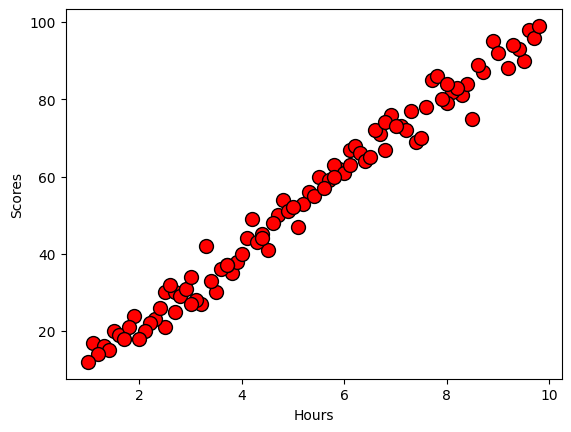

In [9]:
plotData(X, y) #está llamando a la función plotData que definimos anteriormente, y le está pasando dos argumentos: X e y

# <a id="section2"></a>
### 1.2 Descenso por el gradiente

#### 1.2.1 Ecuaciones de actualización

El objetivo de la regresion lineal es minimizar la funcion de costo

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_{\theta}(x^{(i)}) - y^{(i)}\right)^2$$

donde la hipotesis $h_\theta(x)$ esta dada por el modelo lineal
$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1 x_1$$

Los parametros del modelo son los valores $\theta_j$. Estos son los valores que se ajustaran al costo minimo $J(\theta)$. Un camino para lograr esto es usar el algoritmo por lotes del descenso por el gradiente. En el descenso por el gradiente por lotes, cada iteracion ejecuta una actualizacion
$$ \theta_j = \theta_j - \alpha \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x^{(i)}) - y^{(i)}\right)x_j^{(i)} \qquad \text{actualizacion simultanea } \theta_j \text{ for all } j$$

Con cada paso del descenso por el gradiente, los parametros $\theta_j$ son mas cercanos a los valores optimos que permitiran lograr el costo mas bajo J($\theta$).

#### 1.2.2 Implementación

In [10]:
# Agrega una columna de unos a X. La funcion stack de numpy une matrices a lo largo de un eje dado.
# El primer eje (eje = 0) se refiere a filas (ejemplos de entrenamiento)
# y el segundo eje (eje = 1) se refiere a columnas (características).

X = np.stack([np.ones(m), X], axis=1)

<a id="section2"></a>
#### 1.2.3 Cálculo del costo $J(\theta)$

In [11]:
def computeCost(X, y, theta): #nueva función que calcula el costo total (función de costo) para un modelo de regresión lineal.
    # inicializa algunos valores importantes
    m = y.size  # numero de ejemplos de entrenamiento

    J = 0
    h = np.dot(X, theta) #Calcula las predicciones del modelo para cada ejemplo de entrenamiento
    J = (1/(2 * m)) * np.sum(np.square(np.dot(X, theta) - y))
    return J

Ejemplo de funcionamiento de la funcion computeCoste con dos valores diferentes de $\theta$.

In [12]:
J = computeCost(X, y, theta=np.array([0.0, 0.0]))
print('Con theta = [0, 0] el costo calculado es = %.2f' % J)

# pruebas adicionales de la función de costes
J = computeCost(X, y, theta=np.array([-1, 2]))
print('Con theta = [-1, 2] el costo calculado es = %.2f' % J)


Con theta = [0, 0] el costo calculado es = 1768.80
Con theta = [-1, 2] el costo calculado es = 1188.78



#### 1.2.4 Descenso por el gradiente

El costo $J(\theta)$ esta parametrizado por el vector $\theta$, no $X$ y $y$. Donde hay que minimizar el valor de $J(\theta)$ cambiando los valores del vector $\theta$. Una buena manera de verificar si el descenso por el gradiente esta trabajando correctamente es ver los valores de $J(\theta)$ y verificar si estos decresen en cada paso.

In [13]:

def gradientDescent(X, y, theta, alpha, num_iters):
        # Inicializa algunos valores importantes
    m = y.shape[0]  # numero de ejemplos de entrenamiento

    # hace una copia de theta, para evitar cambiar la matriz original,
    # ya que las matrices numpy se pasan por referencia a las funciones

    theta = theta.copy() #pasamos a una theta local el dato

    J_history = [] # Lista que se utiliza para almacenar el costo en cada iteración, para que pueda hacer la grafica

    for i in range(num_iters): #contador de uno hasta el numero de iteraciones
        theta = theta - (alpha / m) * (np.dot(X, theta) - y).dot(X) #theta es un array, todos los vectores por todas las matrices (la theta ya esta transpuesta)
        # save the cost J in every iteration
        J_history.append(computeCost(X, y, theta)) #calculo el costo con el nuevo valor de theta

    return theta, J_history

Se inicializan los parametros $\theta$ con 0 y la taza de aprendizaje $\alpha$ con 0.001.

In [14]:
# inicializa los parametros de ajuste
theta = np.zeros(2)

# configuraciones para el descenso por el gradiente, #las iteraciones y el alpha son el entrenamiento que le das a la ia, si haces muchos ya se lo aprende de memoria
iterations = 100  #numero de iteraciones
alpha = 0.002  #taza de aprendizaje

theta, J_history = gradientDescent(X ,y, theta, alpha, iterations)
print('Theta encontrada por descenso gradiente: {:.4f}, {:.4f}'.format(*theta))
print(f"Costo final después de {iterations} iteraciones: {J_history[-1]:.2f}")
#para estar seguro que los valores de theta tenemos que ver la grafica y si hay una cercania al centro de los puntos

Theta encontrada por descenso gradiente: 1.5618, 9.9408
Costo final después de 100 iteraciones: 5.78


Se utilizan los parametros finales para graficar la linea.

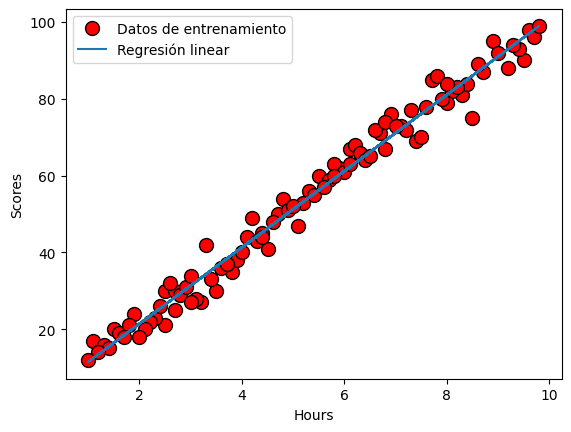

In [15]:
# grafica la linea de ajuste
plotData(X[:, 1], y)
pyplot.plot(X[:, 1], np.dot(X, theta), '-')
pyplot.legend(['Datos de entrenamiento', 'Regresión linear']);

Los valores finales de $\theta$ se utilizaran para realizar predicciones.

In [16]:
# Suponiendo que theta contiene los valores optimizados
# y que deseas predecir la calificación para un estudiante que estudia 5 horas

# Número de horas de estudio para la predicción
hours_studied = 2.7

# Crear el vector de entrada para la predicción (agregar 1 para el término de sesgo)
X_pred = np.array([1, hours_studied])

# Hacer la predicción
predicted_score = np.dot(X_pred, theta)

print(f"Predicción de la calificación para {hours_studied} horas de estudio: {predicted_score:.2f}")


Predicción de la calificación para 2.7 horas de estudio: 28.40


Otra forma de predecir:

In [40]:
#Predecir valores de calificación para estudiantes que estudian 2.5 y 5 horas
#predict1 = np.dot([1, 2.7], theta)
#print('Para un estudiante que estudia 2.7 horas, se predice una calificación de {:.2f}\n'.format(predict1))

#predict2 = np.dot([1, 5], theta)
#print('Para un estudiante que estudia 5 horas, se predice una calificación de {:.2f}\n'.format(predict2))

### 1.4 Visualizar $J(\theta)$

Para comprender mejor la función de costo $J(\theta)$, se graficará la funcion de costo en 2 dimenciones con los valores de $\theta_0$ y $\theta_1$.

El proposito de graficar el costo para observar como $J(\theta)$ varia con cambios en $\theta_0$ y $\theta_1$. La función de costo  $J(\theta)$ tiene forma de una cuenca con un minimo global. (Esto es mas facil observar en los contornos de una superficie 3D). El minimo es el punto optimo para $\theta_0$ y $\theta_1$, en cada paso del descenso por el gradiente se mueve mas cerca a este punto.

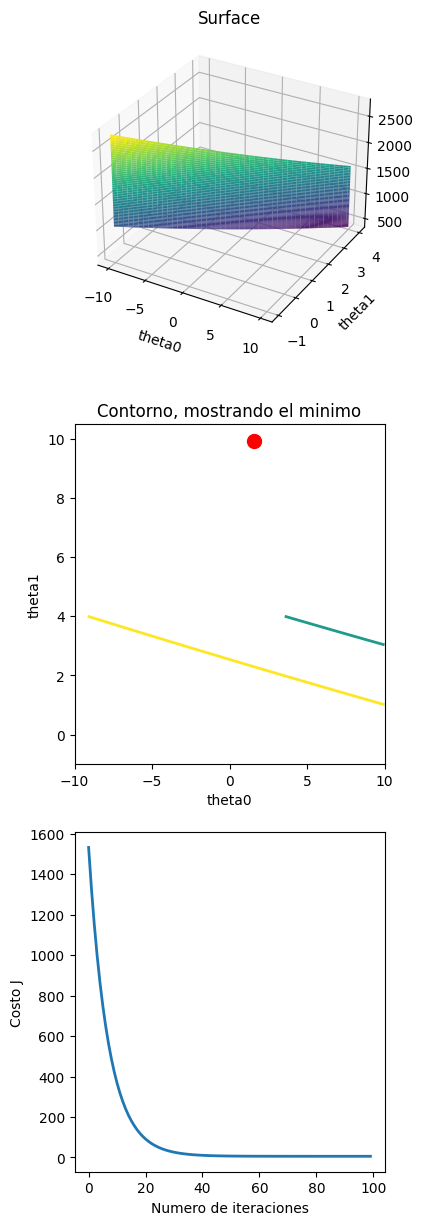

In [17]:
# cuadrícula sobre la que se calcula J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# inicializa J_vals con una matriz de 0's
J_vals = np.zeros((theta0_vals.shape[0], theta1_vals.shape[0]))

# Completar J_vals
for i, theta0 in enumerate(theta0_vals):
    for j, theta1 in enumerate(theta1_vals):
        J_vals[i, j] = computeCost(X, y, [theta0, theta1])

# Debido a la forma en que funcionan las cuadrículas en el comando surf,
# se necesita transponer J_vals antes de llamar a surf, o de lo contrario los ejes se invertirán
J_vals = J_vals.T

# graficar la superficie
fig = pyplot.figure(figsize=(4, 15))
ax = fig.add_subplot(311, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, cmap='viridis')
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.title('Surface')

# graficar contornos
# Grafica J_vals como 15 contours spaciados logaritmicamente entre 0.01 y 100
ax = pyplot.subplot(312)
pyplot.contour(theta0_vals, theta1_vals, J_vals, linewidths=2, cmap='viridis', levels=np.logspace(-2, 3, 20))
pyplot.xlabel('theta0')
pyplot.ylabel('theta1')
pyplot.plot(theta[0], theta[1], 'ro', ms=10, lw=2)
pyplot.title('Contorno, mostrando el minimo')


# Grafica la convergencia del costo
ax = pyplot.subplot(313)
pyplot.plot(np.arange(len(J_history)), J_history, lw=2)
pyplot.xlabel('Numero de iteraciones')
pyplot.ylabel('Costo J')

pass